<a href="https://colab.research.google.com/github/rajpprithiv/Prithivi/blob/main/Crop_Production_in__india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

# train-test split
from sklearn.model_selection import train_test_split

# MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/Crop Production data.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
data.District_Name.value_counts()

,count
District_Name,
BIJAPUR,945
TUMKUR,936
BELGAUM,925
HASSAN,895
BELLARY,887
...,...
HYDERABAD,8
KHUNTI,6
RAMGARH,6


In [ ]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
y = data.Production
X = data.drop(["Production"], axis = 1)

In [ ]:
y

,Production
0,2000.0
1,1.0
2,321.0
3,641.0
4,165.0
...,...
246086,801.0
246087,463.0
246088,16250.0
246089,597899.0


# **Train-Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 90)


In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(196872, 6)
(196872,)
(49219, 6)
(49219,)


# **Splitting train-test dataset into numericals and categoricals for scaling and encoding**

In [ ]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

display(X_train_num.shape)
display(X_train_cat.shape)

display(X_test_num.shape)
display(X_test_cat.shape)

(196872, 2)

(196872, 4)

(49219, 2)

(49219, 4)

# **Scaling train-test dataset using MinMaxscaler**()


In [ ]:
transform = MinMaxScaler().fit(X_train_num)

# scaling train-test dataset using same scaler

X_train_scaled = pd.DataFrame(transform.transform(X_train_num), columns = X_train_num.columns)
X_test_scaled = pd.DataFrame(transform.transform(X_test_num), columns = X_test_num.columns)

display(X_train_scaled.shape)
display(X_test_scaled.shape)

(196872, 2)

(49219, 2)

In [ ]:
data["Crop"].value_counts()
# checking frequency of each crop all over the world.

,count
Crop,
Rice,15104
Maize,13947
Moong(Green Gram),10318
Urad,9850
Sesamum,9046
...,...
Litchi,6
Coffee,6
Apple,4


In [ ]:
data["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [ ]:
data["Crop"].unique().size


124

In [ ]:
df_year = data.groupby("Crop_Year").sum()
df_year.head()

,State_Name,District_Name,Season,Crop,Area,Production
Crop_Year,,,,,,
1997,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,Arhar/TurBajraCastor seedCotton(lint)Dry chill...,2.317150e+08,8.512329e+08
1998,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,Arhar/TurBajraCastor seedCotton(lint)Dry chill...,1.669881e+08,5.825321e+09
1999,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,BajraCastor seedCotton(lint)GroundnutHorse-gra...,1.586661e+08,6.434666e+09
2000,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Kharif Kharif Whole Year Wh...,ArecanutOther Kharif pulsesRiceBananaCashewnut...,1.652975e+08,7.449709e+09
2001,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Kharif Kharif Whole Year Wh...,ArecanutOther Kharif pulsesRiceCashewnutCoconu...,1.652956e+08,7.465541e+09


<BarContainer object of 19 artists>

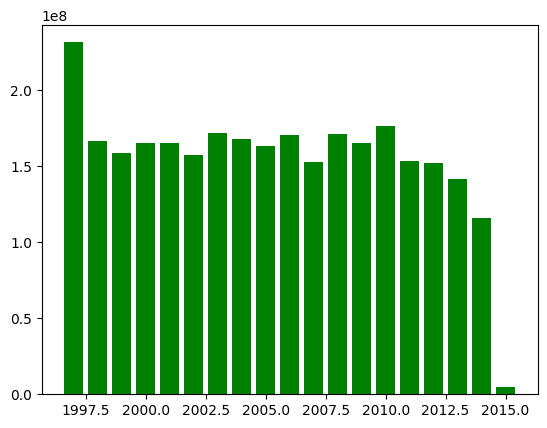

In [ ]:
plt.bar(df_year.index,df_year["Area"],color='g')

# Visualisation the Area of cultivation in each year

<BarContainer object of 19 artists>

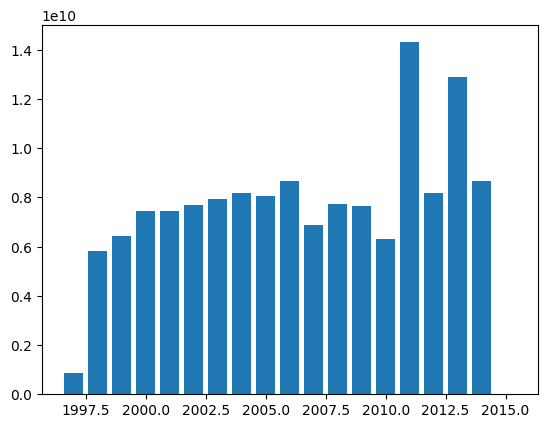

In [ ]:
plt.bar(df_year.index,df_year["Production"])

# visualisation of production of crops in each year.

In [ ]:
data["year_bin"]=pd.cut(x=data.Crop_Year,bins=[1999,2006,2013],labels=["bin_1","bin_2"])

# binning the data based on the year to analyse the crop production before and after 2007 (bin1 and bin 2 respectively)

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,year_bin
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,bin_1
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,bin_1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,bin_1
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,bin_1
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,bin_1


In [ ]:
data[data["year_bin"]=="bin_1"].Area.mean()

# Average area of cultivation of crops in india before 2007

11258.988966586256

In [ ]:
data[data["year_bin"]=="bin_2"].Area.mean()

# Average area of cultivation of crops in india after 2007

11321.441796662195

In [ ]:
data[data["year_bin"]=="bin_1"].Crop.value_counts()
# frequency of  each crop in the country before 2007

,count
Crop,
Rice,6043
Maize,5199
Moong(Green Gram),3797
Sesamum,3655
Urad,3620
...,...
Coffee,6
Apple,4
Peach,4


In [ ]:
data[data["year_bin"]=="bin_2"].Crop.value_counts()
# frequency of  each crop in the country after 2007

,count
Crop,
Rice,6024
Maize,5871
Moong(Green Gram),4660
Urad,4429
Groundnut,3646
...,...
Perilla,9
Tea,8
Grapes,8


In [ ]:
data[data["year_bin"]=="bin_1"].Production.mean()

#Mean of production before 2007

544253.7917733672

In [ ]:
data[data["year_bin"]=="bin_2"].Production.mean()

#Mean of production after 2007

662612.9247734408

# **Comparison of Tamil Nadu stats with National**

In [ ]:
data[data.State_Name=="Tamil Nadu"]


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,year_bin
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN,bin_2
177669,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209.0,NaN,bin_2
177670,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565.0,NaN,bin_2
177671,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190.0,NaN,bin_2
177672,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113.0,NaN,bin_2
...,...,...,...,...,...,...,...,...
191210,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Small millets,1187.0,676.0,bin_2
191211,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sugarcane,2917.0,296017.0,bin_2
191212,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sweet potato,4.0,84.0,bin_2
191213,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Tapioca,4.0,120.0,bin_2


In [ ]:
df_ap=data[data.State_Name=="Tamil Nadu"]
df_ap.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,year_bin
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN,bin_2
177669,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209.0,NaN,bin_2
177670,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565.0,NaN,bin_2
177671,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190.0,NaN,bin_2
177672,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113.0,NaN,bin_2


In [ ]:
df_ap["year_bin"]=pd.cut(x=df_ap.Crop_Year,bins=[1999,2006,2013],labels=["bin_1","bin_2"])
df_ap.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,year_bin
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN,bin_2
177669,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209.0,NaN,bin_2
177670,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565.0,NaN,bin_2
177671,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190.0,NaN,bin_2
177672,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113.0,NaN,bin_2


In [ ]:
df_ap[df_ap["year_bin"]=="bin_1"].Area.mean()


5701.028904503353

In [ ]:
df_ap[df_ap["year_bin"]=="bin_2"].Area.mean()


6187.921917808219

In [ ]:
df_ap[df_ap["year_bin"]=="bin_1"].Production.mean()


54597.51402448979

In [ ]:
df_ap[df_ap["year_bin"]=="bin_2"].Production.mean()


2269221.729134983

In [ ]:
df_ap[df_ap["year_bin"]=="bin_1"].Crop.value_counts()


,count
Crop,
Rice,199
Groundnut,196
Urad,192
Sesamum,192
Moong(Green Gram),191
...,...
Plums,6
Litchi,6
Apple,4


In [ ]:
df_ap[df_ap["year_bin"]=="bin_1"].Crop.value_counts()["Rice"]


199

In [ ]:
df_ap[df_ap["year_bin"]=="bin_2"].Crop.value_counts()


,count
Crop,
Groundnut,268
Cotton(lint),249
Maize,245
Urad,237
Moong(Green Gram),230
Ragi,226
Rice,215
Sugarcane,210
Sunflower,206


In [ ]:
# Adding a new column Yield which indicates Production per unit Area.

data['Yield'] = (data['Production'] / data['Area'])
data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [ ]:
crop_yield = data.groupby('Crop')['Yield'].mean().reset_index()

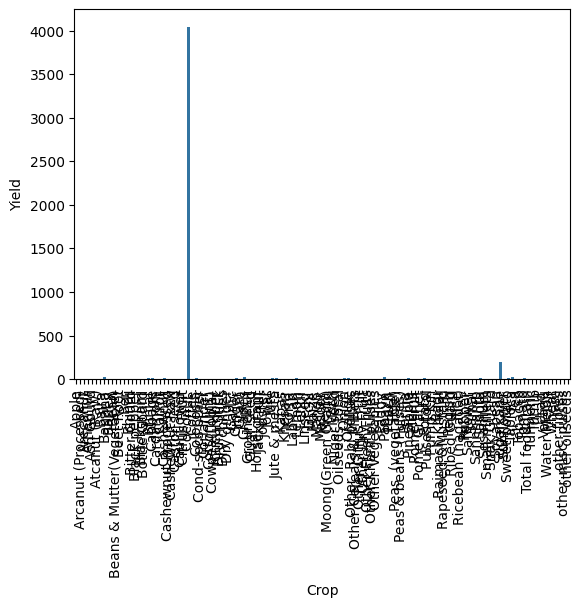

In [ ]:
sns.barplot(x='Crop', y='Yield', data=crop_yield)
plt.xticks(rotation = 90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),

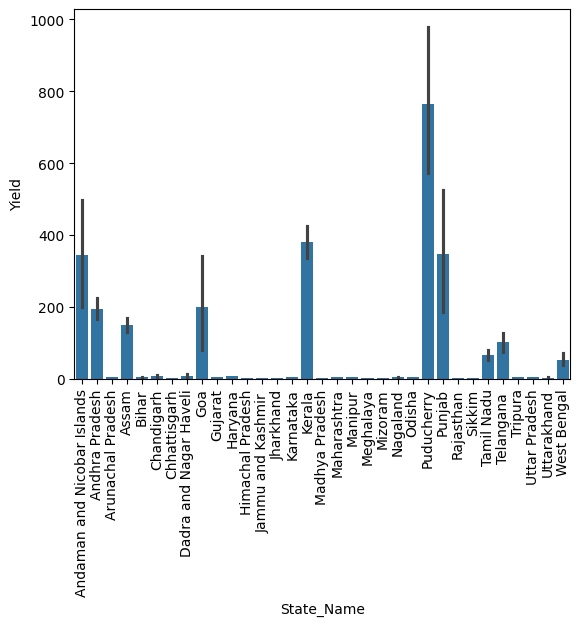

In [ ]:
sns.barplot(x="State_Name", y= "Yield", data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

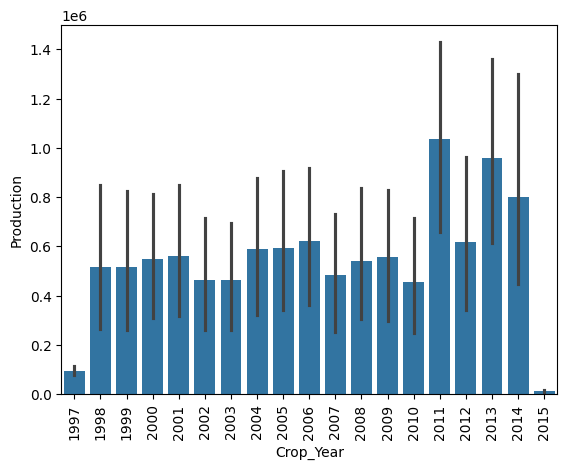

In [ ]:
sns.barplot(x = "Crop_Year", y = "Production", data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

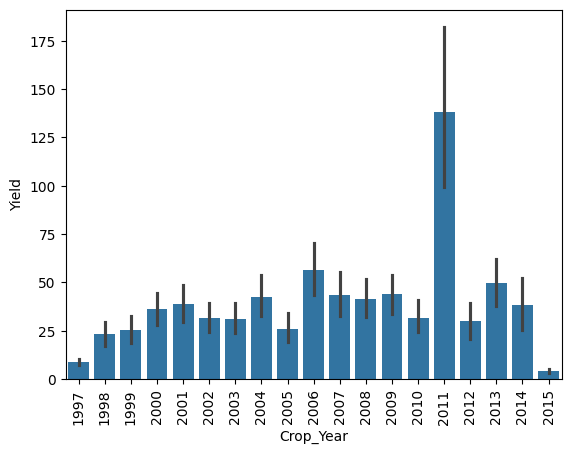

In [ ]:
sns.barplot(x = "Crop_Year", y = "Yield", data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

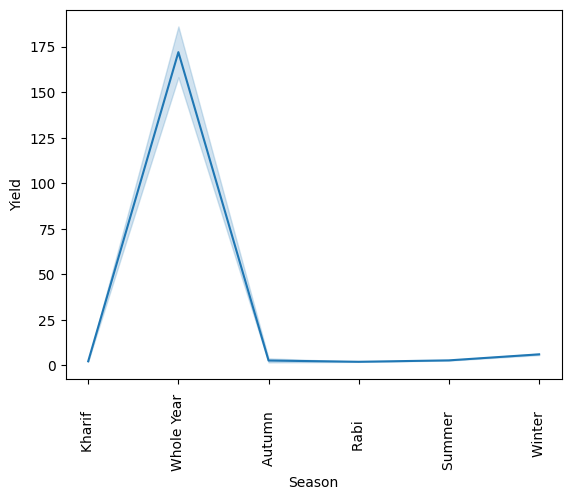

In [ ]:
sns.lineplot(x ="Season", y = "Yield", data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

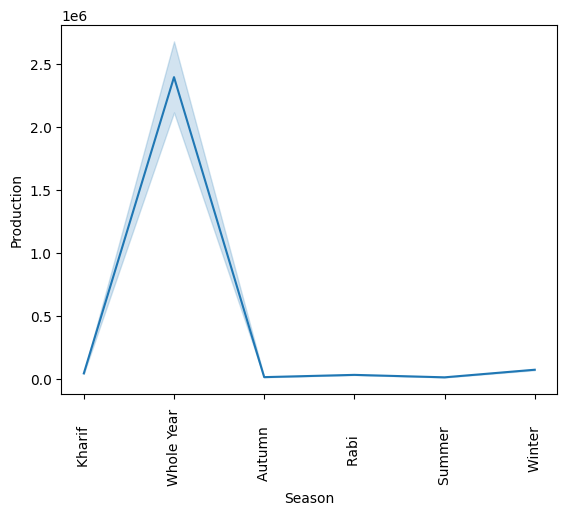

In [ ]:
sns.lineplot(x ="Season", y = "Production", data=data)
plt.xticks(rotation = 90)

# **Rice**

In [ ]:
rice_data = data[data["Crop"]=="Rice"]
rice_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,2.468992
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,2.415477
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,2.731061
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,2.617647


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Autumn     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Whole Year '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

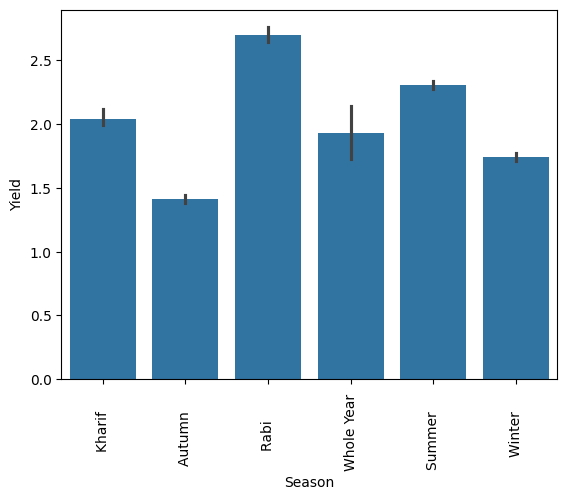

In [ ]:
sns.barplot(x = "Season",y = "Yield",data = rice_data)
plt.xticks(rotation = 90)

In [ ]:
rice_data.shape

(15104, 8)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),

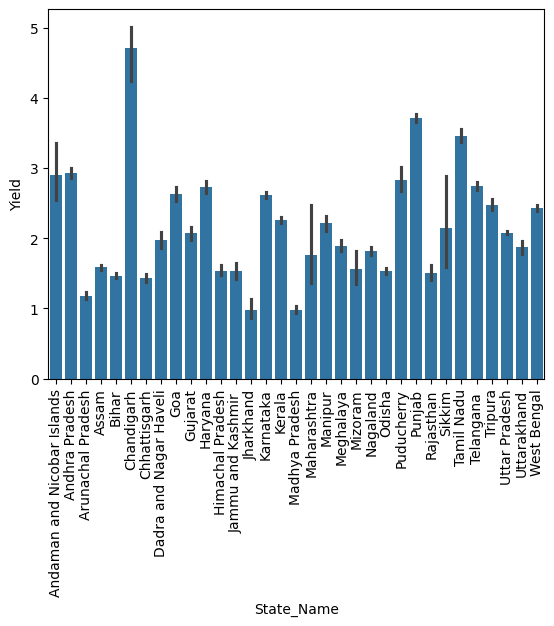

In [ ]:
sns.barplot(x = "State_Name",y ="Yield",data=rice_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

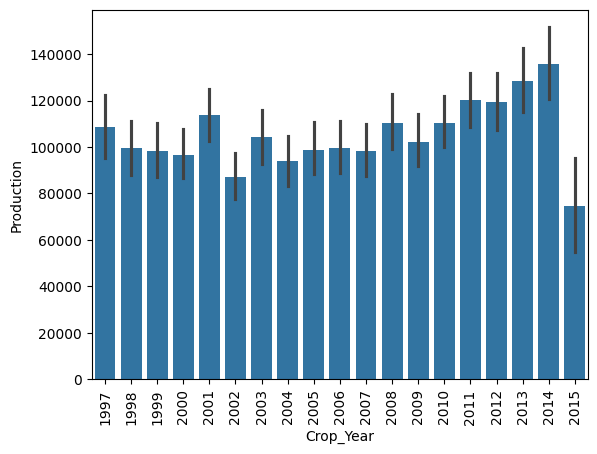

In [ ]:
sns.barplot(x = "Crop_Year", y= "Production",data=rice_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

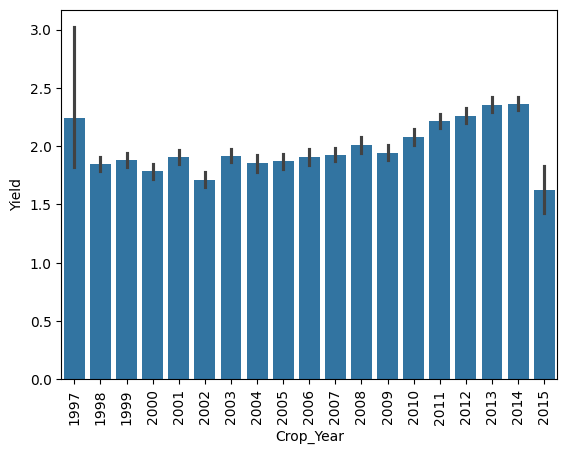

In [ ]:
sns.barplot(x = "Crop_Year",y = "Yield",data=rice_data)
plt.xticks(rotation=90)

Observations :

Rice yield is maximum in Rabi season.
Rice yield is maximum in Chandigarh.
Rice yield has been growing a little from the year 2009 to 2014.

# **WHEAT**

In [ ]:
wheat_data = data[data["Crop"]=="Wheat"]
wheat_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.666667
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.500000
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.669704
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.571154
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.693811
...,...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0,2.559364
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0,2.237234
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0,2.008495
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0,2.253580


<Axes: xlabel='Season', ylabel='Yield'>

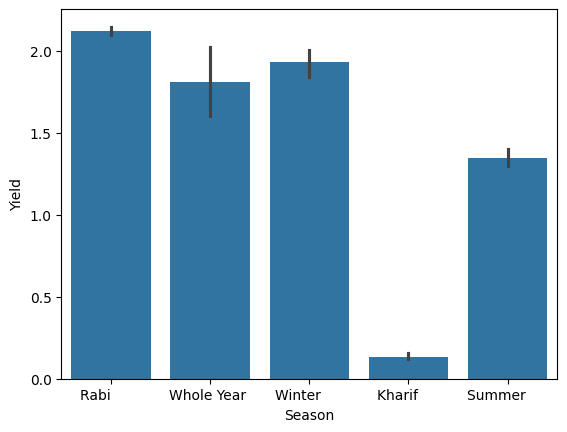

In [ ]:
sns.barplot(x="Season",y="Yield",data = wheat_data)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Kerala'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Maharashtra'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Mizoram'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Punjab'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Sikkim'),
  Text(23, 0, 'Tamil Nadu'),
  Text(24, 0, 'Telangana '),
  Text(25, 0, 'Tripura'),
  Text(26, 0, 'Uttar Pradesh'),
  Text(27, 0, 'Uttarakhand'),
  Text(28, 0, 'West Bengal')]

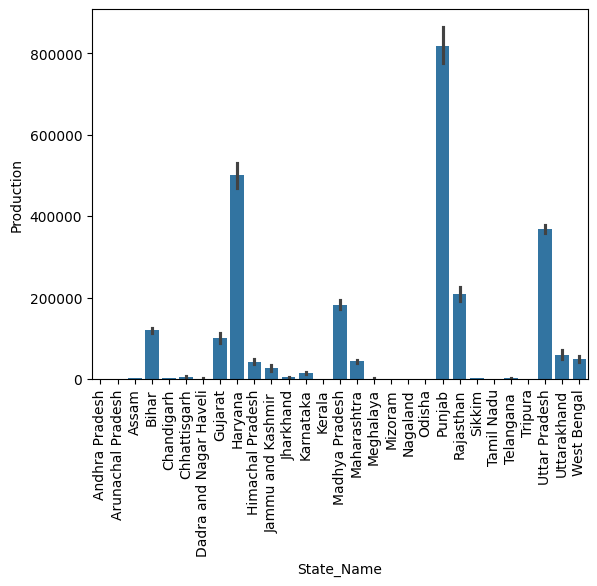

In [ ]:
sns.barplot(x = "State_Name",y="Production",data = wheat_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

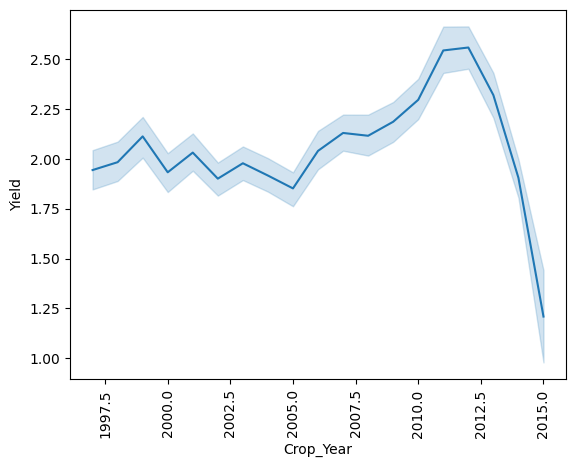

In [ ]:
sns.lineplot(x ="Crop_Year",y="Yield",data=wheat_data)
plt.xticks(rotation=90)

# Coconut

In [ ]:
coconut_data = data[data["Crop"]=="Urad"]
coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
75,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Urad,1.5,1.16,0.773333
125,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Urad,1059.5,458.79,0.433025
199,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Urad,34.0,15.05,0.442647
270,Andhra Pradesh,ANANTAPUR,1999,Kharif,Urad,4.0,2.00,0.500000
309,Andhra Pradesh,ANANTAPUR,2000,Kharif,Urad,135.0,8.00,0.059259
...,...,...,...,...,...,...,...,...
246000,West Bengal,PURULIA,2012,Kharif,Urad,9258.0,2910.00,0.314323
246011,West Bengal,PURULIA,2012,Rabi,Urad,259.0,133.00,0.513514
246033,West Bengal,PURULIA,2013,Kharif,Urad,12986.0,2877.00,0.221546
246070,West Bengal,PURULIA,2014,Kharif,Urad,11493.0,3287.00,0.286000


<Axes: xlabel='Season', ylabel='Yield'>

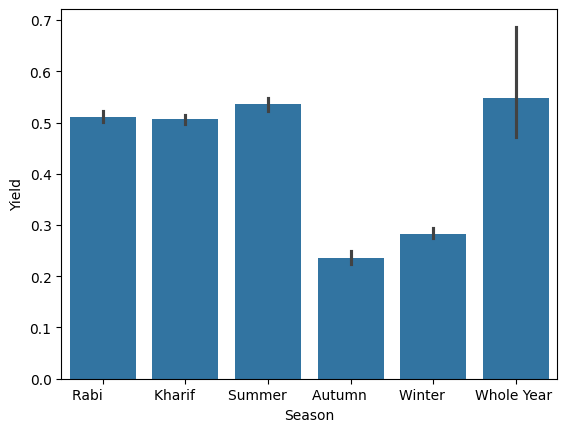

In [ ]:
sns.barplot(x="Season",y="Yield",data = coconut_data)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

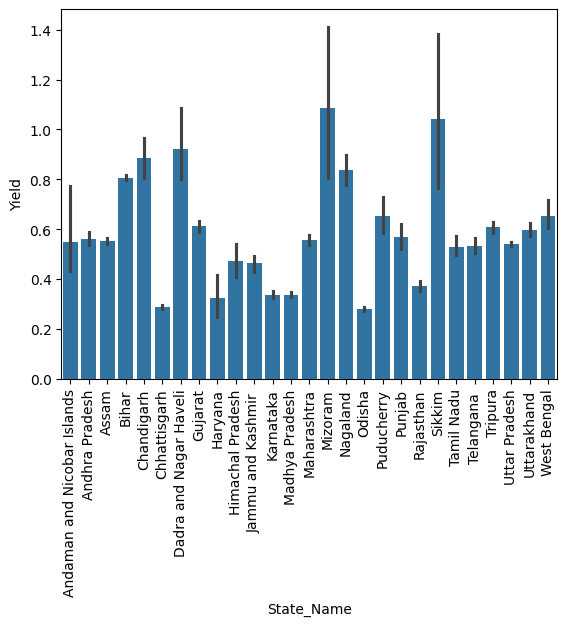

In [ ]:
sns.barplot(x ="State_Name",y="Yield",data = coconut_data)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

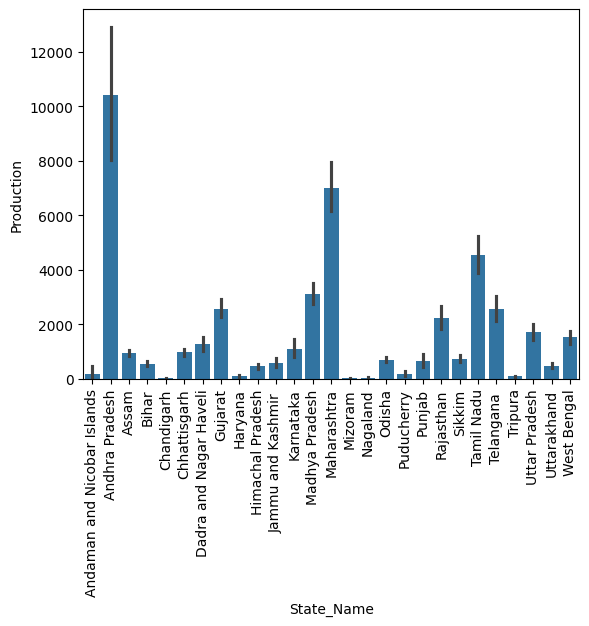

In [ ]:
sns.barplot(x= "State_Name",y= "Production",data = coconut_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

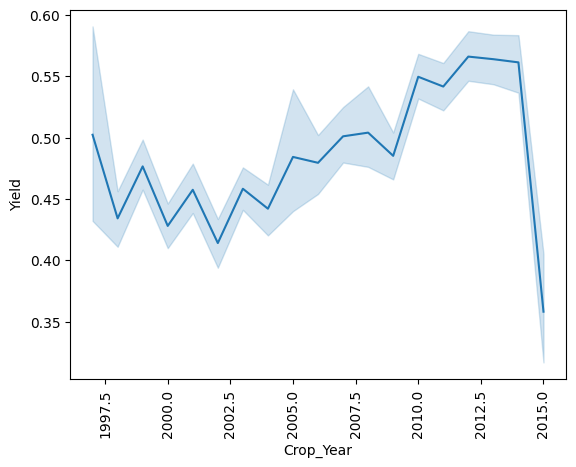

In [ ]:
sns.lineplot(x="Crop_Year",y="Yield",data=coconut_data)
plt.xticks(rotation=90)

Observations obtained :

Andhra Pradesh is the largest producing cocnut states.
Production per unit area is higher in Mizoram ans Sikkim.
Coconut yield is decreasing in the year 2012 to 2015.

# 4. **POTATO**

In [ ]:
potato_data = data[data["Crop"]=="Potato"]
potato_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
331,Andhra Pradesh,ANANTAPUR,2000,Whole Year,Potato,4.0,34.0,8.500000
433,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Potato,2.0,17.0,8.500000
530,Andhra Pradesh,ANANTAPUR,2004,Whole Year,Potato,2.0,20.0,10.000000
745,Andhra Pradesh,ANANTAPUR,2010,Whole Year,Potato,21.0,236.0,11.238095
792,Andhra Pradesh,ANANTAPUR,2011,Whole Year,Potato,18.0,181.0,10.055556
...,...,...,...,...,...,...,...,...
245945,West Bengal,PURULIA,2010,Rabi,Potato,977.0,15920.0,16.294780
245976,West Bengal,PURULIA,2011,Rabi,Potato,1077.0,17412.0,16.167131
246008,West Bengal,PURULIA,2012,Rabi,Potato,913.0,17203.0,18.842278
246043,West Bengal,PURULIA,2013,Rabi,Potato,1726.0,43703.0,25.320394


<Axes: xlabel='Season', ylabel='Production'>

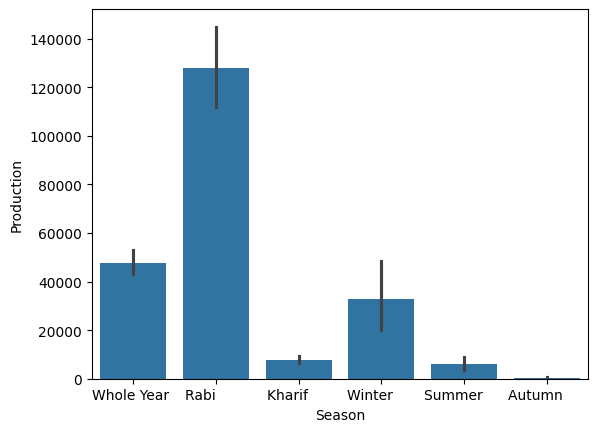

In [ ]:
sns.barplot(x ="Season",y="Production",data = potato_data)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu and Kashmir '),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Manipur'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Mizoram'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'Odisha'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

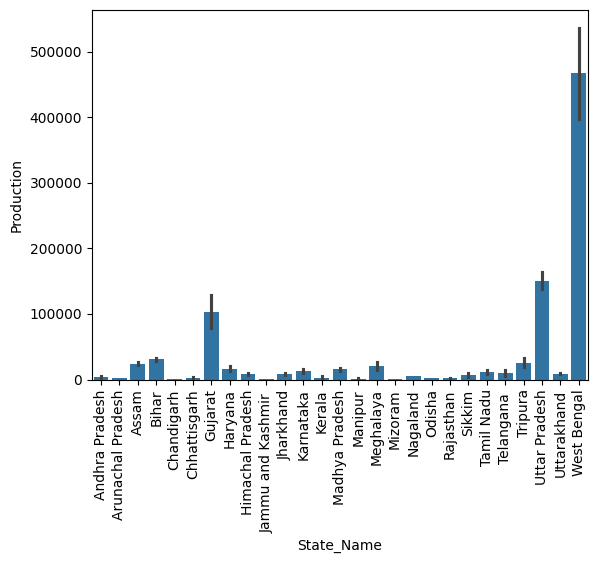

In [ ]:
sns.barplot(x = "State_Name",y= "Production",data = potato_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

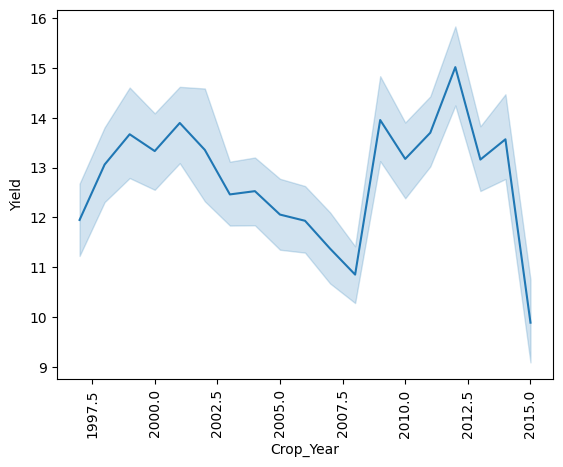

In [ ]:
sns.lineplot(x="Crop_Year",y="Yield",data=potato_data)
plt.xticks(rotation=90)

Conclusions obtained :

Potato is a Rabi crop.
West Bengal is the largest producer of potatoes.

# 5. **ONION**

In [ ]:
onion_data = data[data["Crop"]=="Onion"]
onion_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
286,Andhra Pradesh,ANANTAPUR,1999,Whole Year,Onion,1770.0,32364.0,18.284746
300,Andhra Pradesh,ANANTAPUR,2000,Kharif,Onion,1103.0,15470.0,14.025385
320,Andhra Pradesh,ANANTAPUR,2000,Rabi,Onion,482.0,11514.0,23.887967
348,Andhra Pradesh,ANANTAPUR,2001,Kharif,Onion,1165.0,19232.0,16.508155
365,Andhra Pradesh,ANANTAPUR,2001,Rabi,Onion,380.0,8465.0,22.276316
...,...,...,...,...,...,...,...,...
236375,Uttarakhand,UTTAR KASHI,2010,Whole Year,Onion,47.0,306.0,6.510638
236398,Uttarakhand,UTTAR KASHI,2011,Whole Year,Onion,8.0,52.0,6.500000
236420,Uttarakhand,UTTAR KASHI,2012,Whole Year,Onion,23.0,150.0,6.521739
236443,Uttarakhand,UTTAR KASHI,2013,Whole Year,Onion,32.0,212.0,6.625000


<Axes: xlabel='Season', ylabel='Yield'>

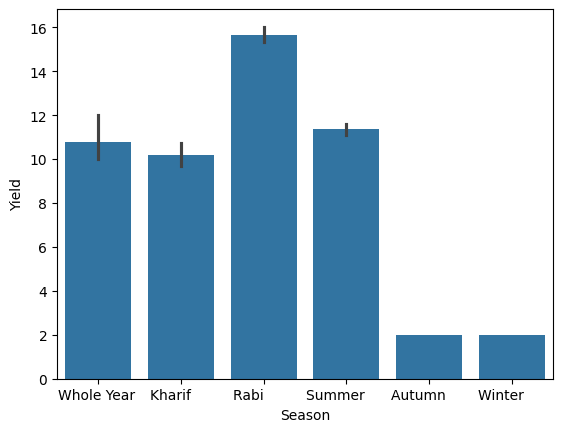

In [ ]:
sns.barplot(x="Season",y="Yield",data = onion_data)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Chhattisgarh'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'Haryana'),
  Text(7, 0, 'Himachal Pradesh'),
  Text(8, 0, 'Jammu and Kashmir '),
  Text(9, 0, 'Jharkhand'),
  Text(10, 0, 'Karnataka'),
  Text(11, 0, 'Kerala'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Manipur'),
  Text(15, 0, 'Odisha'),
  Text(16, 0, 'Puducherry'),
  Text(17, 0, 'Rajasthan'),
  Text(18, 0, 'Tamil Nadu'),
  Text(19, 0, 'Telangana '),
  Text(20, 0, 'Uttar Pradesh'),
  Text(21, 0, 'Uttarakhand')])

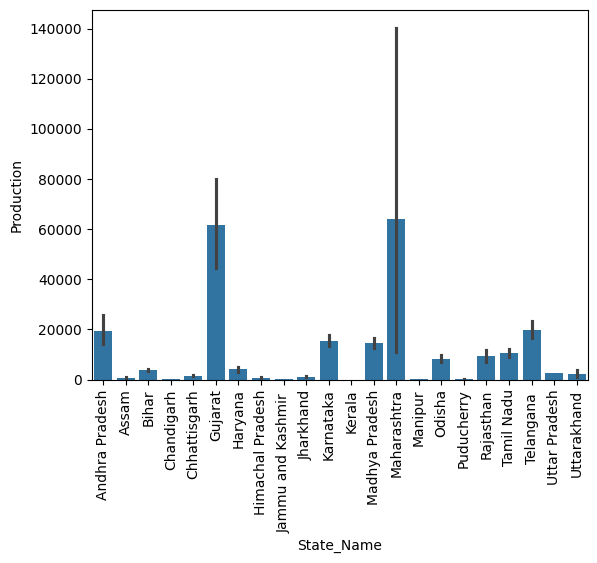

In [ ]:
sns.barplot(x="State_Name",y="Production",data = onion_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. ]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0')])

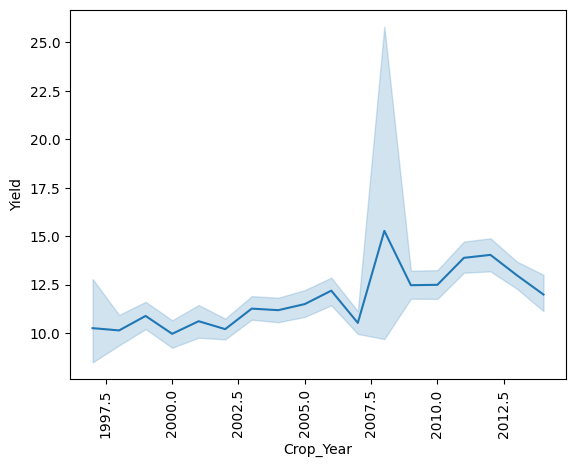

In [ ]:
sns.lineplot(x="Crop_Year",y="Yield",data=onion_data)
plt.xticks(rotation=90)

Observations :

Onion is a Rabi crop.
Gujrat and Maharastra are the major onion-producing states.

# 6. **MAIZE**

In [ ]:
maize_data = data[data["Crop"]=="Maize"]
maize_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
71,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22,4.744792
120,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40,1.111880
194,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00,3.465753
212,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00,1.750000
226,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00,4.000000
...,...,...,...,...,...,...,...,...
246013,West Bengal,PURULIA,2012,Summer,Maize,290.00,476.00,1.641379
246020,West Bengal,PURULIA,2013,Autumn,Maize,6189.00,10665.00,1.723219
246048,West Bengal,PURULIA,2013,Summer,Maize,325.00,522.00,1.606154
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,13337.00,2.111287


<Axes: xlabel='Season', ylabel='Yield'>

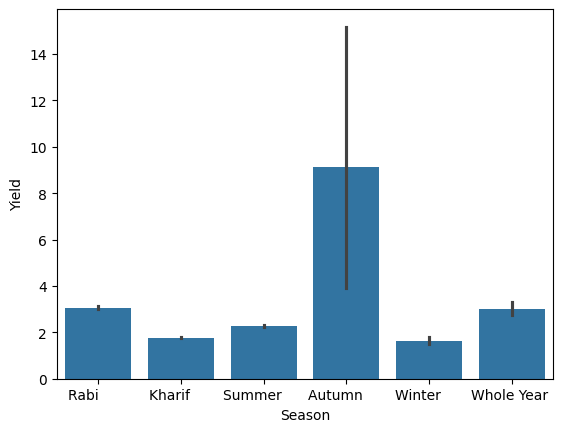

In [ ]:
sns.barplot(x ="Season",y="Yield",data = maize_data)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Rajasthan'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(

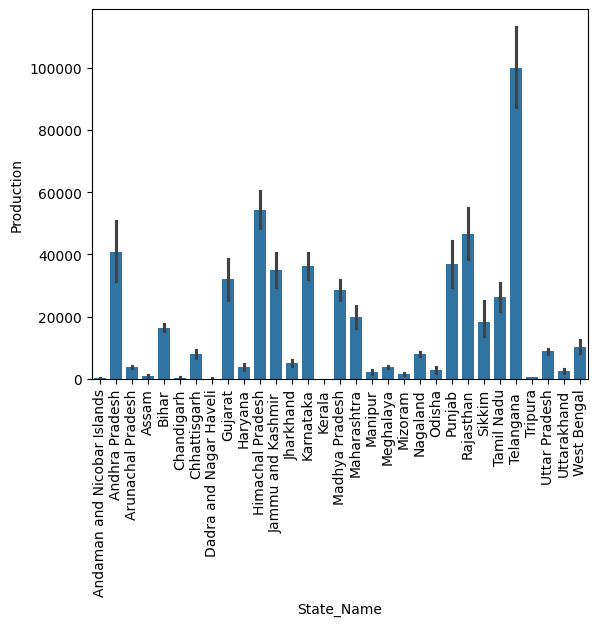

In [ ]:
sns.barplot(x ="State_Name",y="Production",data = maize_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

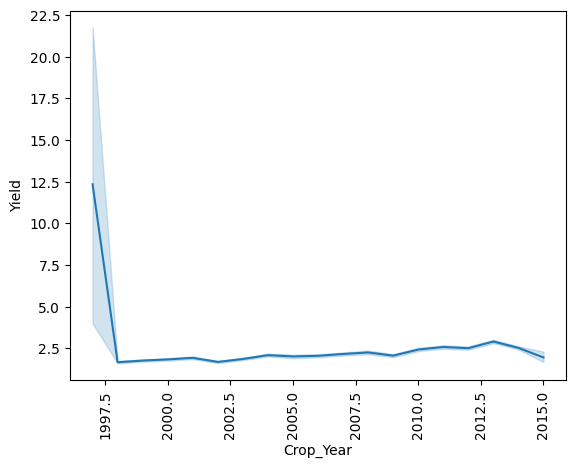

In [ ]:
sns.lineplot(x = "Crop_Year",y="Yield",data=maize_data)
plt.xticks(rotation=90)

Observations Obtained -

Maize is produced in the autumn season
Telangana is the major maize-producing states.
There was a sudden decline in maize production from the year 2000.